# Principal Component Analysis with Sckikit_Learn

This handout accompanies the lecture on Principal Component Analysis (PCA) and
assumes the material presented there. 

$X$ is an $n\times p$ matrix representing a set of $n$ data points in a $p$ 
dimensional space. This is usually $\mathbb{R}^p$ but can be restricted to the 
orthant where all entries are non-negative. 

PCA determines orthogonal coordinates representing, in sequence, perpendicular
directions of greatest variance of the data. This amounts to finding eigenvectors
of the $p\times p$ symmetric matrix $X^t X$: ${\bf w}_1, \ldots, {\bf w}_p$ 
and their eigenvalues: $\lambda_1, \ldots, \lambda_p$, where 

$\lambda_1 \geq \lambda_2 \geq \cdots \geq \lambda_1 \geq 0$

So $X^tX {\bf w}_i = \lambda_i {\bf w}_i$.

$\lambda_i$ is called the {\em explained variance} in the direction ${\bf w}_i$. 

The fraction $\frac{\lambda_i}{\lambda_1 + \cdots + \lambda_p}$ is called
the {\em explained variance ratio}.



In [1]:
import numpy as np
from sklearn.decomposition import PCA
import random
from numpy import linalg as LA
import matplotlib.pyplot as plt

### Example "by hand"

Start with a small data set in two dimensions:

In [2]:
X = np.array([[-1, 1], [2, -1], [2,-3], [1, -1], [2, 1], [-3, 2]])
X

array([[-1,  1],
       [ 2, -1],
       [ 2, -3],
       [ 1, -1],
       [ 2,  1],
       [-3,  2]])

array([[-1,  1],
       [ 2, -1],
       [ 2, -3],
       [ 1, -1],
       [ 2,  1],
       [-3,  2]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


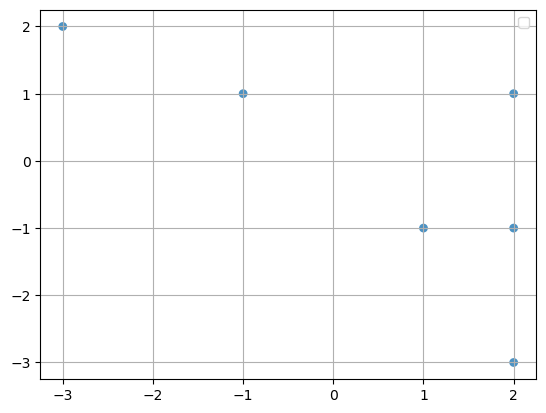

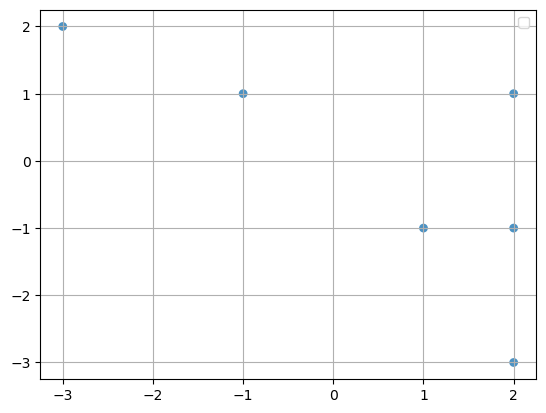

In [3]:
fig, ax = plt.subplots()

scale = 40
ax.scatter(X[:,0],X[:,1],  s=scale, alpha=0.8, edgecolors='none')

ax.legend()
ax.grid(True)

plt.show()

In order to apply PCA, the data must be mean centered. Find the mean, then subtract
the mean from the data. It happens that the mean is close to the origin, so the shift 
is small in magnitude.

Also, the mean of the mean centered data is effectively [0,0].

In [4]:
X.mean(axis = 0)

array([ 0.5       , -0.16666667])

array([ 0.5       , -0.16666667])

In [5]:
X_centered = X - X.mean(axis = 0)
X_centered.mean(axis=0)

array([ 0.00000000e+00, -7.40148683e-17])

array([ 0.00000000e+00, -7.40148683e-17])

Next, compute the eigenvalues and vectors of the symmetric matrix $A = X_{centered}^tX_{centered}$ using 
the eigenvalue/vector function in numpy.linalg (aliased as LA).

In [6]:
A = np.matmul(X_centered.T,X_centered)
A


array([[ 21.5       , -13.5       ],
       [-13.5       ,  16.83333333]])

array([[ 21.5       , -13.5       ],
       [-13.5       ,  16.83333333]])

$W$ is the vector of eigenvalues of $A$ and $V$ is the matrix of eigenvectors of $A$.

In [7]:
W, V = LA.eig(A)
W, V

(array([32.86682887,  5.46650446]),
 array([[ 0.76495565,  0.64408296],
        [-0.64408296,  0.76495565]]))

(array([32.86682887,  5.46650446]),
 array([[ 0.76495565,  0.64408296],
        [-0.64408296,  0.76495565]]))

Notice the columns of $V$ are perpendicular (that's easy to see -- take their dot product).
Using the LA.norm function we see that they are also of unit length. 
                                             

In [8]:
LA.norm(V[:,0]), LA.norm(V[:,1])

(1.0, 1.0)

(1.0, 1.0)

The following plot of the mean-centered data shows the eigenvectors of $A$. Notice 
how the first vector (in red) is aligned with the direction of the greatest spread
of the data. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


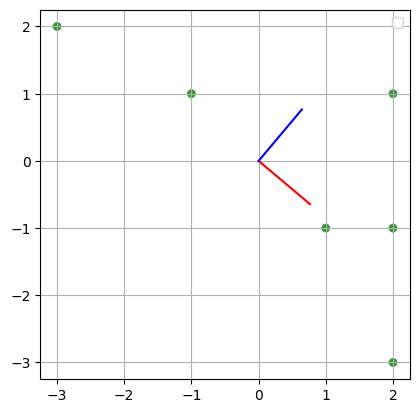

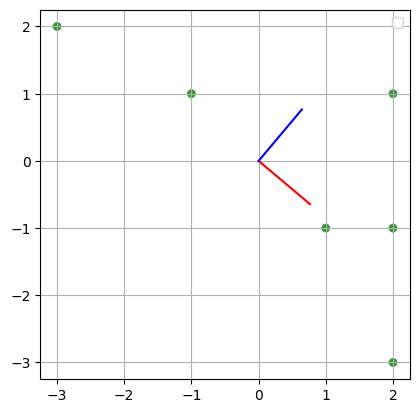

In [9]:
fig, ax = plt.subplots()

scale = 40
ax.scatter(X[:,0],X[:,1],  s=scale, c = 'g',alpha=0.8, edgecolors='none')
ax.plot([0,0.76495565],[0,-0.64408296],c = 'r')
ax.plot([0,0.64408296],[0,0.76495565],c = 'b')
ax.legend()
ax.set_aspect(1)
ax.grid(True)

plt.show()

Now let's apply the PCA command to the mean centered data.

In [10]:
pca = PCA(n_components=2)
pca.fit(X_centered)

PCA(n_components=2)

PCA(n_components=2)

The PCA components are the eigevectors we computed above, and the singular
values are the square roots of the eigenvalues we computed above:

In [11]:
pca.components_ 

array([[-0.76495565,  0.64408296],
       [ 0.64408296,  0.76495565]])

array([[-0.76495565,  0.64408296],
       [ 0.64408296,  0.76495565]])

In [12]:
 pca.singular_values_ , np.sqrt(W)

(array([5.73295987, 2.3380557 ]), array([5.73295987, 2.3380557 ]))

(array([5.73295987, 2.3380557 ]), array([5.73295987, 2.3380557 ]))

The explained variance is 

In [13]:
ev = pca.explained_variance_
ev

array([6.57336577, 1.09330089])

array([6.57336577, 1.09330089])

In [14]:
pca.explained_variance_ratio_

array([0.85739554, 0.14260446])

array([0.85739554, 0.14260446])

Or:

In [15]:
ev[0]/(ev[0]+ev[1])

0.8573955357836884

0.8573955357836884

In [16]:
pca.explained_variance_ratio_

array([0.85739554, 0.14260446])

array([0.85739554, 0.14260446])

Finally, we have the coordinates of X in the principal component coordinates. These
are the coordinates of the data in terms of the eigenvectors:

In [17]:
Y = pca.transform(X_centered)

In [18]:
Y

array([[ 1.89886359, -0.07367618],
       [-1.68416927,  0.3286614 ],
       [-2.97233519, -1.2012499 ],
       [-0.91921362, -0.31542156],
       [-0.39600335,  1.85857269],
       [ 4.07285784, -0.59688645]])

array([[ 1.89886359, -0.07367618],
       [-1.68416927,  0.3286614 ],
       [-2.97233519, -1.2012499 ],
       [-0.91921362, -0.31542156],
       [-0.39600335,  1.85857269],
       [ 4.07285784, -0.59688645]])

We can compute this matrix directly from X_centered data by taking the dot product
with $V$ from above.

In [19]:
new_coords = np.zeros((6,2))
for j in range(6):
    print([np.dot(X_centered[j],V[0,:]),np.dot(X_centered[j],V[1,:])])


[-0.39600335300368805, 1.8585726930956854]
[0.6106976724934627, -1.6035874772694854]
[-0.6774682444451849, -3.1334987722266847]
[-0.15425797498513677, -0.9595045188001616]
[1.8988635894321106, -0.07367618231228612]
[-1.2818316894915638, 3.9116942575129325]
[-0.39600335300368805, 1.8585726930956854]
[0.6106976724934627, -1.6035874772694854]
[-0.6774682444451849, -3.1334987722266847]
[-0.15425797498513677, -0.9595045188001616]
[1.8988635894321106, -0.07367618231228612]
[-1.2818316894915638, 3.9116942575129325]


Let's plot the transformed data:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


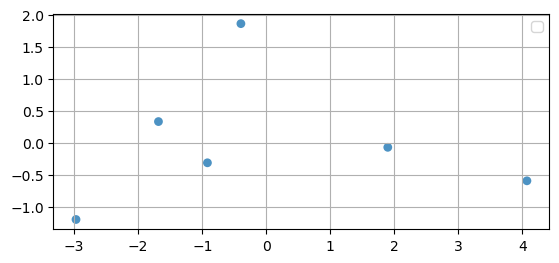

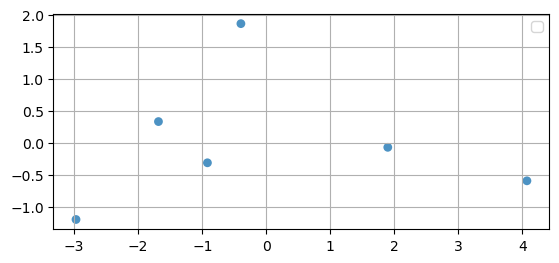

In [20]:
fig, ax = plt.subplots()

scale = 40
ax.scatter(Y[:,0],Y[:,1],  s=scale, alpha=0.8, edgecolors='none')

ax.legend()
ax.grid(True)
ax.set_aspect(1)
plt.show()

# Iris data set (from Scikit-Learn)

Unlike the toy example, the Iris data set lives in a higher dimension, $p = 4$, so that dimension
reduction is necessary for viewing the data set. 

Before working through the following, restart the kernel and clear outputs to avoid
conflicting uses of variables.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# from sklearn import decomposition
from sklearn import datasets

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401


Let's load the data set and check to see what we've got:

In [22]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [23]:
X[:5,:], y[:5]

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2]]),
 array([0, 0, 0, 0, 0]))

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2]]),
 array([0, 0, 0, 0, 0]))

Run the pca command. 

In [24]:
pca = PCA(n_components=3)
pca.fit(X)
Y = pca.transform(X)

Notice that $Y$ has three columns:

In [25]:
np.shape(Y)

(150, 3)

(150, 3)

In [26]:
Y[:5]

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924]])

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924]])

The eigenvectors in the four dimensional feature space are. Notice there are
only three because we specified 3 principal components.

In [27]:
pca.components_ 

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143]])

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143]])

The singular values are:

In [28]:
pca.singular_values_ 

array([25.09996044,  6.01314738,  3.41368064])

array([25.09996044,  6.01314738,  3.41368064])

The explained variances are as follows. Notice the first principal direction accounts
for most of the variance:

In [29]:
pca.explained_variance_, pca.explained_variance_ratio_

(array([4.22824171, 0.24267075, 0.0782095 ]),
 array([0.92461872, 0.05306648, 0.01710261]))

(array([4.22824171, 0.24267075, 0.0782095 ]),
 array([0.92461872, 0.05306648, 0.01710261]))

Now let's plot the transformed data:

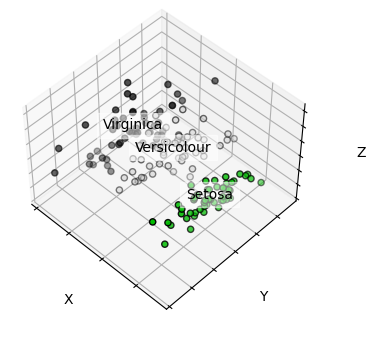

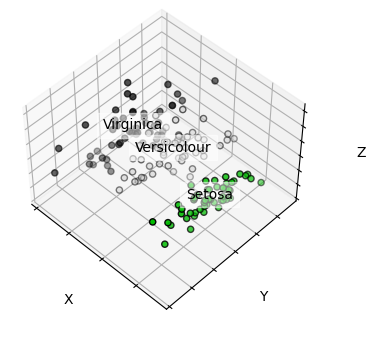

In [31]:
fig = plt.figure(1, figsize=(4, 3))
plt.clf()

ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])
ax.set_aspect('auto')

plt.cla()

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        Y[y == label, 0].mean(),
        Y[y == label, 1].mean(),
        Y[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(Y[:, 0], Y[:, 1], Y[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="k")

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()

# Olivetti faces dataset

The following is taken from the Scikit-Learn description:

https://scikit-learn.org/stable/datasets/real_world.html#olivetti-faces-dataset

The Olivetti faces dataset a set of face images taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The sklearn.datasets.fetch_olivetti_faces function is the data fetching/caching function that downloads the data archive from AT&T.

As described on the original website:

There are ten different images of each of 40 distinct subjects. For some subjects, the images were taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement).

Data Set Characteristics: 

* Classes: 40
* Samples total: 400
* Dimensionality: 4096
* Features: real, between 0 and 1

The image is quantized to 256 grey levels and stored as unsigned 8-bit integers; the loader will convert these to floating point values on the interval [0, 1], which are easier to work with for many algorithms.

The “target” for this database is an integer from 0 to 39 indicating the identity of the person pictured; however, with only 10 examples per class, this relatively small dataset is more interesting from an unsupervised or semi-supervised perspective.

The original dataset consisted of 92 x 112, while the version available here consists of 64x64 images.

When using these images, please give credit to AT&T Laboratories Cambridge.

Clear your kernel before proceeding.

In [33]:
import logging
import numpy as np
from numpy.random import RandomState
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn import cluster
from sklearn import decomposition

rng = RandomState(0)

The following code block will download the data. Pay attention to the location 
of the download. You may need to move it to your course folder.

In [34]:
# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format="%(asctime)s %(levelname)s %(message)s")

faces, _ = fetch_olivetti_faces(return_X_y=True, shuffle=True, random_state=rng)

In [35]:
n_samples, n_features = faces.shape

# Global centering (focus on one feature, centering all samples)
faces_centered = faces - faces.mean(axis=0)

# Local centering (focus on one sample, centering all features)
faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)

print("Dataset consists of %d faces" % n_samples)

Dataset consists of 400 faces
Dataset consists of 400 faces


We can plot the gallery of faces using the following function. Note, you can change
the size and shape of the displayed image array by changing 2,3 to another pair of
positive integer.

In [36]:
n_row, n_col = 4,3
n_components = n_row * n_col
image_shape = (64, 64)

def plot_gallery(title, images, n_col=n_col, n_row=n_row, cmap=plt.cm.gray):
    fig, axs = plt.subplots(
        nrows=n_row,
        ncols=n_col,
        figsize=(2.0 * n_col, 2.3 * n_row),
        facecolor="white",
        constrained_layout=True,
    )
    fig.set_constrained_layout_pads(w_pad=0.01, h_pad=0.02, hspace=0, wspace=0)
    fig.set_edgecolor("black")
    fig.suptitle(title, size=16)
    for ax, vec in zip(axs.flat, images):
        vmax = max(vec.max(), -vec.min())
        im = ax.imshow(
            vec.reshape(image_shape),
            cmap=cmap,
            interpolation="nearest",
            vmin=-vmax,
            vmax=vmax,
        )
        ax.axis("off")

    fig.colorbar(im, ax=axs, orientation="horizontal", shrink=0.99, aspect=40, pad=0.01)
    plt.show()

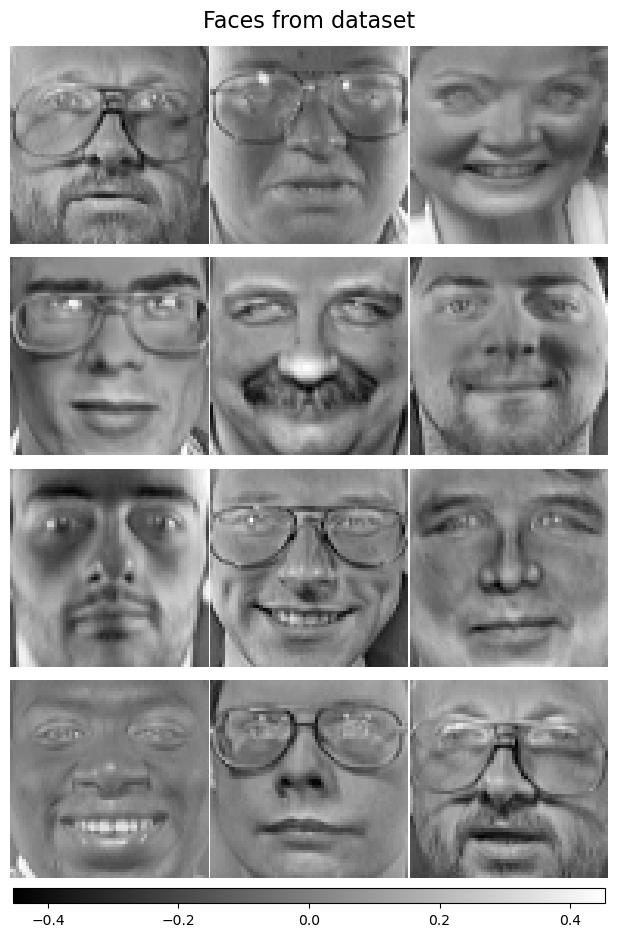

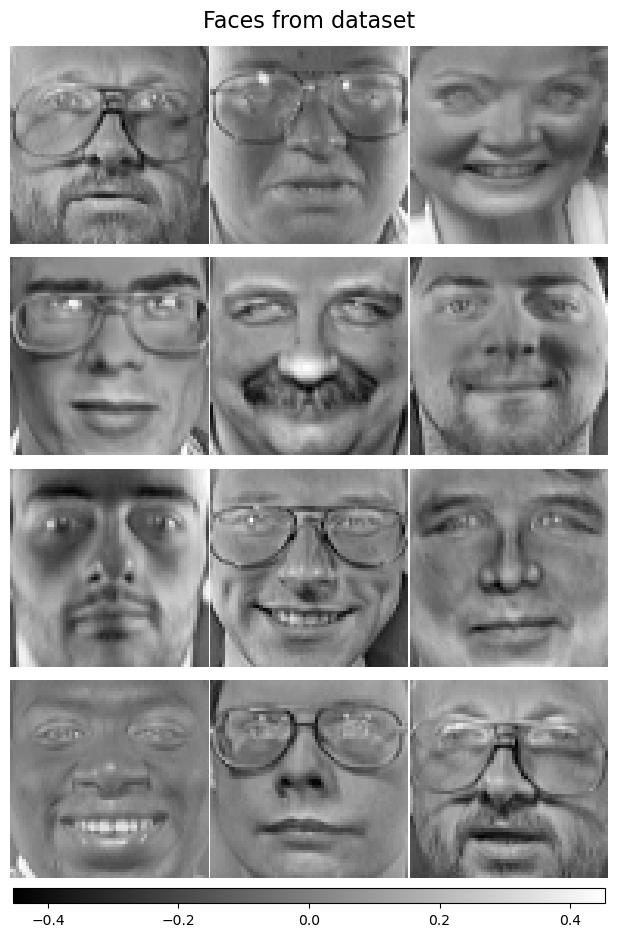

In [37]:
plot_gallery("Faces from dataset", faces_centered[:n_components])

Although the faces are rendered as 64 x 64 gray scale images, the PCA algorithm works with reshaped vectors
with length 64 x 64 = 4096. So we have 400 face images converted to length 4096 vectors. So that
our matrix $X$ is now $400 \times 4096$. 

Applying the PCA algorithmn will produce the principal component vectors of size 4096. These can
be reshaped to produce $64 \times 64$ images, which are commonly called eigenfaces. Let's take a
a look at the first 6 eigenfaces:

By changing 2 and 3 here, we can view more eigenfaces of decreasing variance.

What do you observe about the eigenfaces as you look down the output list when you
rerun the above command?

We can also check the explained variance and explained variance ratio. What do you 
observe about these values compared to the toy example and iris dataset example?

In [38]:
pca_estimator.explained_variance_

NameError: name 'pca_estimator' is not defined

NameError: name 'pca_estimator' is not defined

In [ ]:
pca_estimator.explained_variance_ratio_

Can you apply 𝑘-means clustering to this data set, then generate a color coded scatter plot in 2D or 3D?

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].

ax.scatter(Y[:,0],Y[:,1],Y[:,2])

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

# Approximating a Face

Choose a face at random and view the face:

In [49]:
rand_face_number = np.random.randint(400)
rand_face_number

5

5

In [50]:
rand_face = faces_centered[rand_face_number]
np.shape(rand_face)

(4096,)

(4096,)

In [51]:
rand_face = np.reshape(rand_face,(64,64))

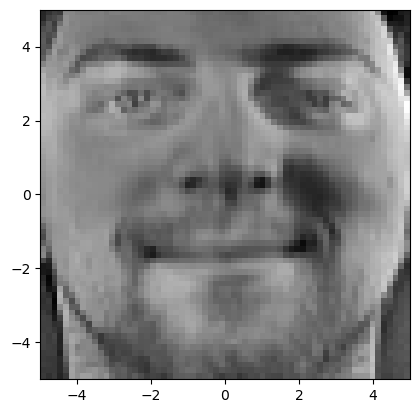

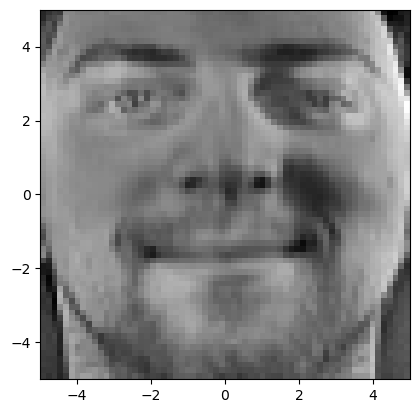

In [52]:
plt.imshow(rand_face, cmap=plt.cm.gray, extent=[-5, 5, -5, 5])

Compute the first n_row x n_col principal components of all the faces:

In [53]:
n_row, n_col = 2,2
n_components = n_row * n_col
image_shape = (64, 64)

In [54]:
def plot_gallery(title, images, n_col=n_col, n_row=n_row, cmap=plt.cm.gray):
    fig, axs = plt.subplots(
        nrows=n_row,
        ncols=n_col,
        figsize=(2.0 * n_col, 2.3 * n_row),
        facecolor="white",
        constrained_layout=True,
    )
    fig.set_constrained_layout_pads(w_pad=0.01, h_pad=0.02, hspace=0, wspace=0)
    fig.set_edgecolor("black")
    fig.suptitle(title, size=16)
    for ax, vec in zip(axs.flat, images):
        vmax = max(vec.max(), -vec.min())
        im = ax.imshow(
            vec.reshape(image_shape),
            cmap=cmap,
            interpolation="nearest",
            vmin=-vmax,
            vmax=vmax,
        )
        ax.axis("off")

    fig.colorbar(im, ax=axs, orientation="horizontal", shrink=0.99, aspect=40, pad=0.01)
    plt.show()

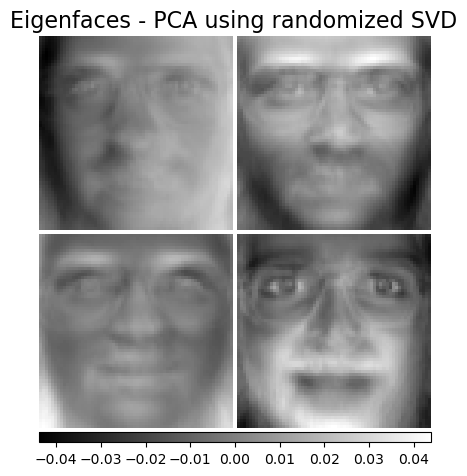

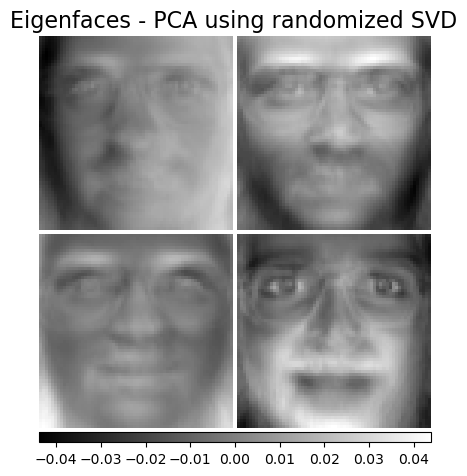

In [55]:
pca_estimator = decomposition.PCA(
    n_components=n_components, svd_solver="randomized", whiten=True
)
pca_estimator.fit(faces_centered)
plot_gallery(
    "Eigenfaces - PCA using randomized SVD", pca_estimator.components_[:n_components]
)

In [56]:
Y = pca_estimator.transform(faces_centered)

In [57]:
Y[rand_face_number]

array([-0.12871613, -0.62737864, -1.4816141 , -1.0549647 ], dtype=float32)

array([-0.12871613, -0.62737864, -1.4816141 , -1.0549647 ], dtype=float32)

In [58]:
rand_face_approx = np.dot(Y[rand_face_number],pca_estimator.components_[:n_components])

In [59]:
rand_face_approx = np.reshape(rand_face_approx,(64,64))

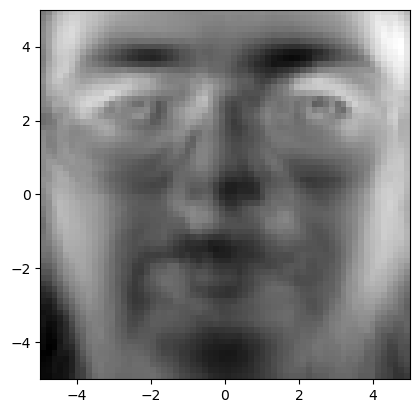

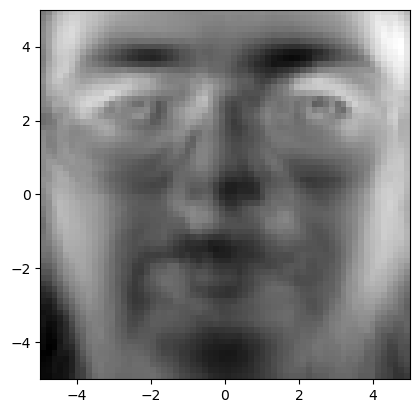

In [60]:
plt.imshow(rand_face_approx, cmap=plt.cm.gray, extent=[-5, 5, -5, 5])

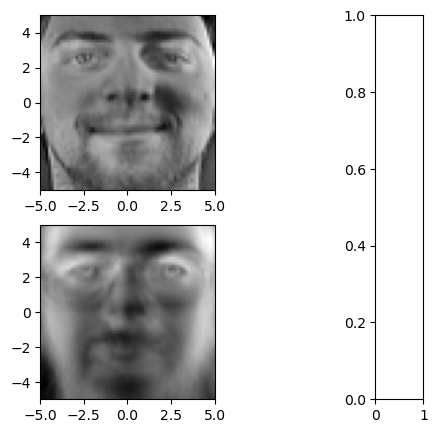

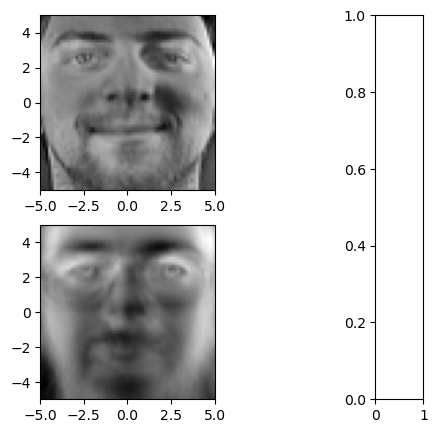

In [61]:
plt.subplot(211)
plt.imshow(rand_face, cmap=plt.cm.gray, extent=[-5, 5, -5, 5])
plt.subplot(212)
plt.imshow(rand_face_approx, cmap=plt.cm.gray, extent=[-5, 5, -5, 5])

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])

plt.show()

# Further Explorations

* The link above to the Olivetti data investigates several other dimension reduction
methods that are matrix based. Try out some of these.

* Another well-known data set is the handwritten digits data set. Here's a link to the Scikit-Learn
page:
    
    https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py